<a href="https://colab.research.google.com/github/gomigom1068/YBIGTA_DA/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%B0%EB%8B%AC%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)'

/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)


In [ ]:
#!unzip -qq '/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/KT_빅데이터플랫폼_데이터셋.zip'

In [ ]:
#!unzip -qq '/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/covid_19_dataset.zip'

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.font_manager as fm
import itertools
import statsmodels.api as sm 
import random
import datetime

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

In [ ]:
dlvr=pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/dlvr_call.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SN	순번	순번

PROCESS_DT	처리일시	날짜

DLVR_REQUST_ENTRPS_ID	배달요청업체ID	배달요청업체 ID

DLVR_REQUST_STTUS_VALUE	배달요청상태값	배달요청상태값

		1:완료,2:취소,3:사고,4:문의

DLVR_RCEPT_ENTRPS_ID	배달접수업체ID	배달접수회사 ID

DLVR_STORE_ID	배달상점ID	배달상점 식별 값

DLVR_STORE_INDUTY_NM	배달상점 업종명	배달상점 업종이름 (카테고리)

DLVR_STORE_LEGALDONG_CODE	배달상점법정동코드	배달상점 주소 법정동코드

DLVR_STORE_BRTC_NM	배달상점광역시도명	배달상점 주소 시도명

DLVR_STORE_SIGNGU_NM	배달상점시군구명	배달상점 주소 시군구명

DLVR_STORE_LEGALDONG_NM	배달상점법정동명	배달상점 주소 법정동 읍면동명

DLVR_STORE_LI_NM	배달상점리명	배달상점 주소 법정동 리명

DLVR_STORE_ADSTRD_CODE	배달상점행정동코드	배달상점 주소 행정동 코드

DLVR_STORE_RDNMADR_CODE	배달상점도로명주소 코드	배달상점주소 도로명주소 코드

DLVR_DSTN_LEGALDONG_CODE	배달목적지법정동코드	배달목적지 주소 법정동코드

DLVR_DSTN_BRTC_NM	배달목적지광역시도명	배달목적지 주소 법정동 시도명

DLVR_DSTN_SIGNGU_NM	배달목적지시군구명	배달목적지 주소 법정동 시군구명

DLVR_DSTN_LEGALDONG_NM	배달목적지법정동명	배달목적지 주소 법정동 읍면동명

DLVR_DSTN_LI_NM	배달목적지 리명	배달목적지 주소 법정동 리명

DLVR_DSTN_ADSTRD_CODE	배달목적지행정동코드	배달목적지 주소 행정동 코드

DLVR_DSTN_RDNMADR_CODE	배달목적지도로명주소 코드	배달목적지주소 도로명주소 코드

DLVR_MAN_ID	배달자ID	배달기사 식별번호

DLVR_AMOUNT	배달금액	배달서비스 금액

CALL_RLAY_FEE_AMOUNT	호출중계수수료금액	배달호출 중계수수료 금액

GOODS_AMOUNT	상품금액	배달상품금액

SETLE_KND_VALUE	결제종류값	결제종류번호

		1:카드,2:선불,3:현금,4:현->카,5:카->현,6:카->선,7:선->카,8:선->현,9:현->선,10:후불,11:-

SETLE_CARD_NM	결제카드명	결제카드종류

DLVR_RCEPT_TIME	배달접수시간	배달접수시간

DLVR_CARALC_TIME	배달배차시간	배달배차시간

DLVR_RECPT_TIME	배달수령시간	배달수령시간

DLVR_COMPT_TIME	배달완료시간	배달완료시간

DLVR_CANCL_TIME	배달취소시간	배달취소시간

In [ ]:
dlvr

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N


In [ ]:
dlvr[dlvr['DLVR_STORE_INDUTY_NM']=='도시락']

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
456,3487665,2019-12-01,C000130,1,C000130,S0002272,도시락,4128112300,경기도,고양시 덕양구,화정동,\N,4128162100,412814376369,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,412813192087,D0003249,3000,300,21000,2,NaN,2019-12-01 22:26:25,2019-12-01 22:26:43,2019-12-01 22:35:43,2019-12-01 22:35:44,\N
1046,3543553,2019-12-01,C000238,1,C000238,S0001446,도시락,4119010100,경기도,부천시,원미동,\N,4119060600,411903185012,4119010200,경기도,부천시,심곡동,\N,4119060300,411904352310,D0004840,4000,200,14300,1,승인:NH농협카드,2019-12-01 19:19:07,2019-12-01 19:41:58,2019-12-01 19:53:25,2019-12-01 19:54:07,\N
1409,3544142,2019-12-01,C000130,1,C000130,S0002272,도시락,4128112300,경기도,고양시 덕양구,화정동,\N,4128162100,412814376369,4128112800,경기도,고양시 덕양구,행신동,\N,4128165000,412813192065,D0006220,4000,300,15500,2,NaN,2019-12-01 18:43:09,2019-12-01 18:46:45,2019-12-01 19:13:55,2019-12-01 19:13:57,\N
1457,3544221,2019-12-01,C000130,1,C000130,S0002272,도시락,4128112300,경기도,고양시 덕양구,화정동,\N,4128162100,412814376369,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,\N,D0002259,3000,300,20000,2,NaN,2019-12-01 19:40:55,2019-12-01 19:41:09,2019-12-01 19:53:37,2019-12-01 19:54:53,\N
1513,3544308,2019-12-01,C000254,1,C000254,S0020965,도시락,4119010800,경기도,부천시,중동,\N,4119061000,411904352206,4119010800,경기도,부천시,중동,\N,4119061000,411904352516,D0004887,4000,200,75710,3,NaN,2019-12-01 20:30:06,2019-12-01 20:30:37,2019-12-01 20:43:49,2019-12-01 20:47:38,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295784,7749820,2020-03-31,C000036,1,C000043,S0036863,도시락,4115011000,경기도,의정부시,가능동,\N,4115061500,4.11503E+11,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11504E+11,D0009040,3500,300,22000,2,NaN,2020-03-31 23:33,2020-03-31 23:33,2020-03-31 23:42,2020-03-31 23:42,\N
4295828,7749879,2020-03-31,C000036,1,C000043,S0036863,도시락,4115011000,경기도,의정부시,가능동,\N,4115061500,4.11503E+11,4115011000,경기도,의정부시,가능동,\N,4115061500,4.11504E+11,D0000814,3500,300,15000,2,NaN,2020-03-31 22:31,2020-03-31 22:32,2020-03-31 22:53,2020-03-31 22:53,\N
4295988,7750120,2020-03-31,C000036,1,C000043,S0036863,도시락,4115011000,경기도,의정부시,가능동,\N,4115061500,4.11503E+11,4115011000,경기도,의정부시,가능동,\N,4115061500,4.11504E+11,D0008508,3500,300,14500,2,NaN,2020-03-31 23:09,2020-03-31 23:11,2020-03-31 23:30,2020-03-31 23:40,\N
4296132,7750332,2020-03-31,C000224,1,C000224,S0001490,도시락,4127110300,경기도,안산시 상록구,사동,\N,4127152500,4.12713E+11,4127110300,경기도,안산시 상록구,사동,\N,4127152500,4.12713E+11,D0007994,3300,200,23500,2,NaN,2020-03-31 23:08,2020-03-31 23:10,2020-03-31 23:17,2020-03-31 23:22,\N


In [ ]:
dlvr['SETLE_CARD_NM'].isnull().sum()/len(dlvr)

0.739684484521577

In [ ]:
tp=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/TimeProvince.csv')
tg=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/TimeGender.csv')
ta=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/TimeAge.csv')
Time=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/Time.csv')
SeoulFloating=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/SeoulFloating.csv')
patientinfo=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/PatientInfo.csv')
policy=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/Policy.csv')
case=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/Case.csv')

In [ ]:
patientinfo['confirmed_date']=pd.to_datetime(patientinfo['confirmed_date'])
patientinfo

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [ ]:
data=dlvr.copy()
data['PROCESS_DT'] = pd.to_datetime(data['PROCESS_DT'])

In [ ]:
data.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [ ]:
data_1 = data[data['PROCESS_DT']<='2020-02-29']
data_2 = data[data['PROCESS_DT']>='2020-03-01']

In [ ]:
data_1

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000453,7209755,2020-02-23,C000249,1,C000249,S0022027,피자,4121010300,경기도,광명시,하안동,\N,4121063100,412103000022,4121010100,경기도,광명시,광명동,\N,4121056000,412104361034,D0007713,6000,200,22000,2,NaN,2020-02-23 16:15:32,2020-02-23 16:15:49,2020-02-23 16:28:54,2020-02-23 16:36:39,\N
2000454,7209756,2020-02-23,C000309,1,C000309,S0029005,한식,4115010600,경기도,의정부시,민락동,\N,4115057800,411504343539,4115010700,경기도,의정부시,낙양동,\N,4115057800,\N,D0007556,3500,300,55000,1,승인:신한카드,2020-02-23 17:34:52,2020-02-23 18:01:17,2020-02-23 18:08:38,2020-02-23 18:14:10,\N
2000455,7209757,2020-02-23,C000036,1,C000043,S0036717,한식,4115010100,경기도,의정부시,의정부동,\N,4115052000,411504343156,4115011000,경기도,의정부시,가능동,\N,4115061500,411504343023,D0000880,3500,300,35000,2,NaN,2020-02-23 16:54:56,2020-02-23 16:55:26,2020-02-23 17:10:18,2020-02-23 17:10:29,\N
2000456,7209759,2020-02-23,C000036,1,C000043,S0036355,카페/디저트,4115010100,경기도,의정부시,의정부동,\N,4115051000,411503215066,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343169,D0006279,3500,300,19100,2,NaN,2020-02-23 17:06:17,2020-02-23 17:06:50,2020-02-23 17:18:11,2020-02-23 17:36:46,\N


In [ ]:
plt.style.use('ggplot')

In [ ]:
x_data_1 = data_1['DLVR_STORE_INDUTY_NM'].unique()
y_data_1 = 

array(['족발/보쌈', '치킨', '돈까스/일식', '아시안/양식', '카페/디저트', '패스트푸드', '분식', '회',
       '야식', '한식', '배달전문업체', '중식', '피자', '찜탕', '도시락', '심부름'], dtype=object)

In [ ]:
!python --version

Python 3.7.11


In [ ]:
x_data = ['Apple', 'Huawei', 'Xiaomi', 'Oppo', 'Vivo', 'Meizu']
y_data = [123, 153, 89, 107, 98, 23]

# 坐标轴最大/最小值
bar = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis('판매량', y_data_1)
    .set_series_opts(itemstyle_opts=opts.ItemStyleOpts(border_color='black'))
)

bar.render_notebook()

NameError: ignored

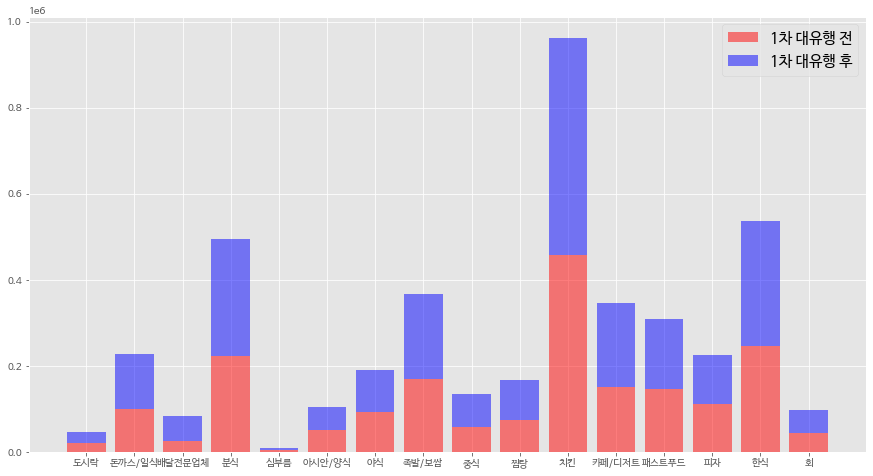

In [ ]:
plt.figure(figsize=(15,8))
plt.rc('font', family='NanumBarunGothic') 
p1 = plt.bar(data_1.groupby('DLVR_STORE_INDUTY_NM').size().index,data_1.groupby('DLVR_STORE_INDUTY_NM').size(),alpha=0.5, color='red')
p2 = plt.bar(data_1.groupby('DLVR_STORE_INDUTY_NM').size().index,data_2.groupby('DLVR_STORE_INDUTY_NM').size(),alpha=0.5,color='blue', bottom=data_1.groupby('DLVR_STORE_INDUTY_NM').size())
plt.legend((p1[0], p2[0]), ('1차 대유행 전', '1차 대유행 후'), fontsize=15)

In [ ]:
data_2.groupby('DLVR_STORE_INDUTY_NM').size()

DLVR_STORE_INDUTY_NM
도시락        24842
돈까스/일식    127477
배달전문업체     57758
분식        272606
심부름         4132
아시안/양식     54459
야식         97493
족발/보쌈     199585
중식         76769
찜탕         91477
치킨        506419
카페/디저트    194622
패스트푸드     163666
피자        112360
한식        290293
회          52706
dtype: int64

In [ ]:
print(len(data_1))
print(len(data_2))

1969607
2326664


In [ ]:
data['DLVR_STORE_INDUTY_NM'].unique()

array(['족발/보쌈', '치킨', '돈까스/일식', '아시안/양식', '카페/디저트', '패스트푸드', '분식', '회',
       '야식', '한식', '배달전문업체', '중식', '피자', '찜탕', '도시락', '심부름'], dtype=object)

In [ ]:
data.groupby('DLVR_STORE_INDUTY_NM').size()

DLVR_STORE_INDUTY_NM
도시락        45869
돈까스/일식    226834
배달전문업체     83810
분식        494233
심부름         7683
아시안/양식    104130
야식        190211
족발/보쌈     367846
중식        133655
찜탕        166300
치킨        962851
카페/디저트    345708
패스트푸드     309206
피자        224504
한식        537266
회          96165
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
confirmed = list(Time['confirmed'])
increase = []
num = []
for i in range(len(confirmed)-1):
    increase.append(confirmed[i+1] - confirmed[i])
    num.append(i)

In [ ]:
idx = pd.to_datetime(Time['date'])
idx = idx.head(-1) 
ts = Series(increase,idx)
t= ts.resample('W').sum()
m = ts.resample('M').sum()
d = ts.resample('D').sum()

In [ ]:
df_confirmed_W = pd.DataFrame()
df_confirmed_W['W']=t
df_confirmed_M = pd.DataFrame()
df_confirmed_M['M'] = m
df_confirmed_D = pd.DataFrame()
df_confirmed_D['D'] = d

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/content/drive/MyDrive/a타이틀고딕3.ttf").get_name()
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

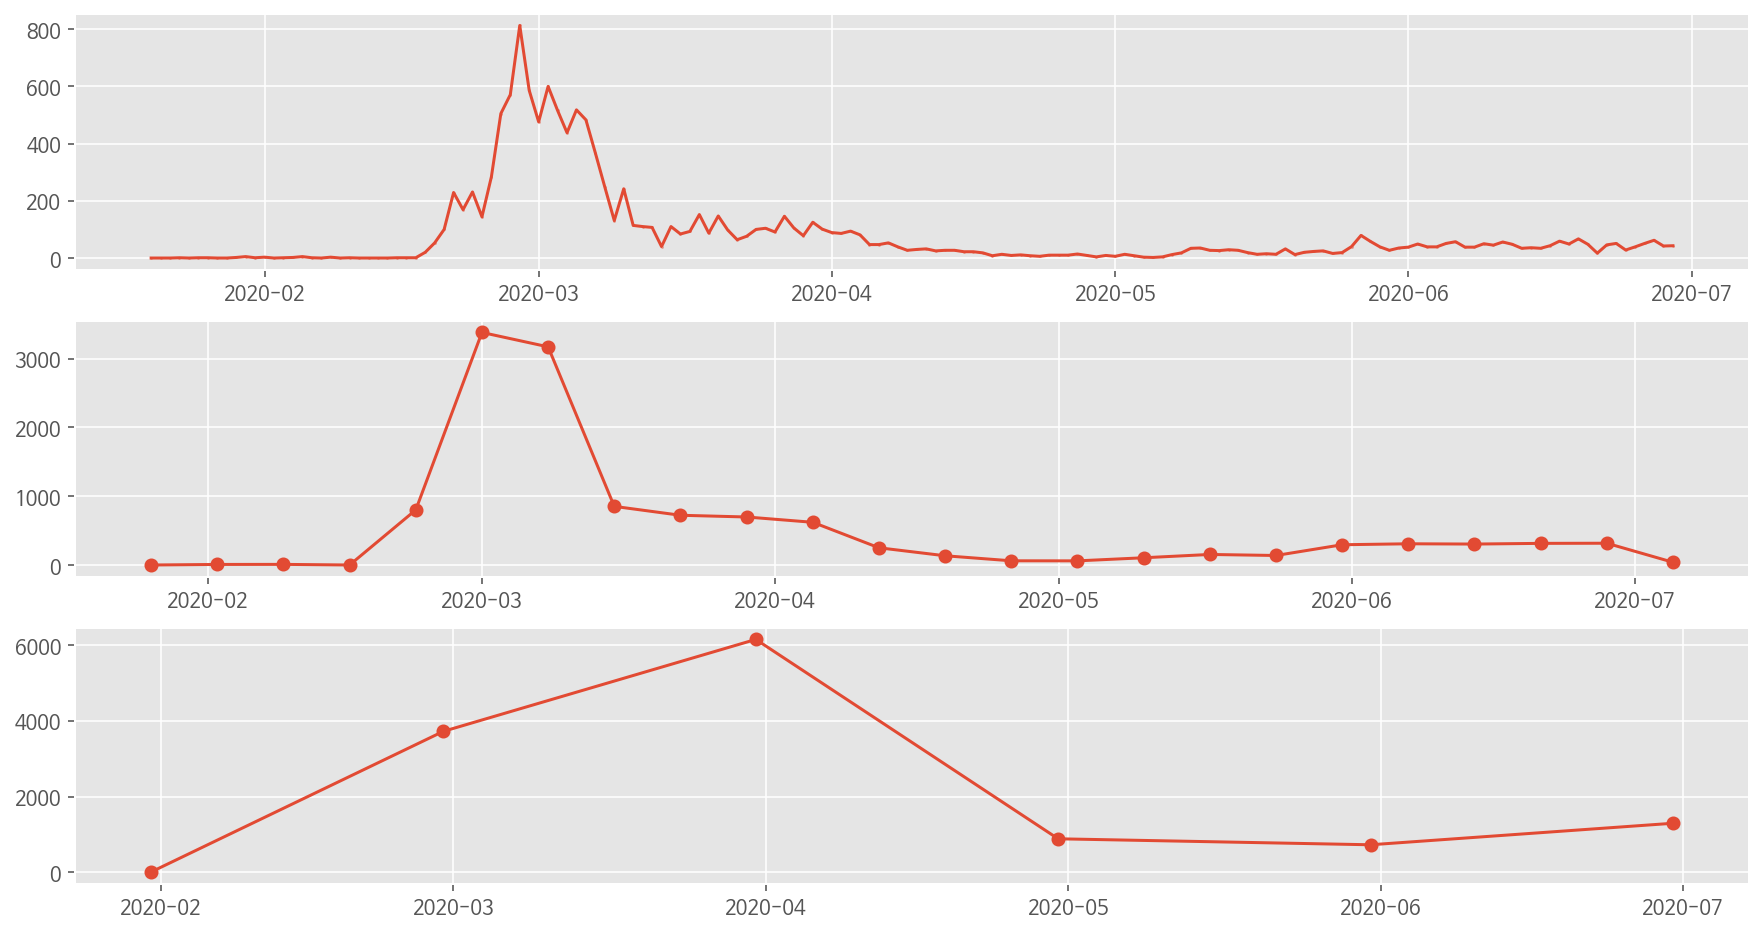

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(15,8))

ax[0].plot(df_confirmed_D.index, df_confirmed_D['D'], marker='o', markersize=0.2)
ax[1].plot(df_confirmed_W.index, df_confirmed_W['W'],marker='o')
ax[2].plot(df_confirmed_M.index, df_confirmed_M['M'],marker='o')

plt.show()

In [ ]:
data.groupby('PROCESS_DT').size()

PROCESS_DT
2019-12-01     9879
2019-12-02    14335
2019-12-03    15802
2019-12-04    15772
2019-12-05    17407
              ...  
2020-05-27    21586
2020-05-28    22892
2020-05-29    26850
2020-05-30    31788
2020-05-31    32623
Length: 182, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 10
plt.rc('figure', titlesize=50)

In [ ]:
days=pd.date_range("2019-12-01",periods=183,freq="D")
days=days.drop(days[days=='2020-05-18'])
days

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=182, freq=None)

In [ ]:
dlvr[dlvr['PROCESS_DT']=='2020-03-01'].groupby('DLVR_STORE_INDUTY_NM').size()

DLVR_STORE_INDUTY_NM
도시락         252
돈까스/일식     3202
배달전문업체      928
분식         6350
심부름          52
아시안/양식     1414
야식         2670
족발/보쌈      5270
중식         2174
찜탕         2616
치킨        14166
카페/디저트     5772
패스트푸드      4324
피자         3998
한식         7266
회          1248
dtype: int64

In [ ]:
dlvr.groupby('DLVR_STORE_INDUTY_NM').size()

DLVR_STORE_INDUTY_NM
도시락        45869
돈까스/일식    226834
배달전문업체     83810
분식        494233
심부름         7683
아시안/양식    104130
야식        190211
족발/보쌈     367846
중식        133655
찜탕        166300
치킨        962851
카페/디저트    345708
패스트푸드     309206
피자        224504
한식        537266
회          96165
dtype: int64

In [ ]:
dlvr

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N


In [ ]:
dlvr[dlvr['PROCESS_DT']=='2020-03-01'].groupby('DLVR_STORE_SIGNGU_NM').size()

DLVR_STORE_SIGNGU_NM
강서구             2
고양시 덕양구      3744
고양시 일산동구       94
고양시 일산서구      644
관악구           506
광명시          5140
광주시           430
구로구          4982
구리시            18
금천구          2376
김포시            92
남양주시         2144
노원구           662
도봉구          1434
동두천시         1204
동작구           750
부천시          7472
서대문구           26
서초구           100
수원시 권선구        92
수원시 팔달구        18
시흥시          1710
안산시 상록구      2546
안양시 동안구      1258
안양시 만안구         6
양주시           388
양천구           308
연천군           120
영등포구         2022
용인시 처인구       336
은평구          1188
의정부시        16176
파주시           198
평택시          1628
포천시           934
화성시           954
dtype: int64

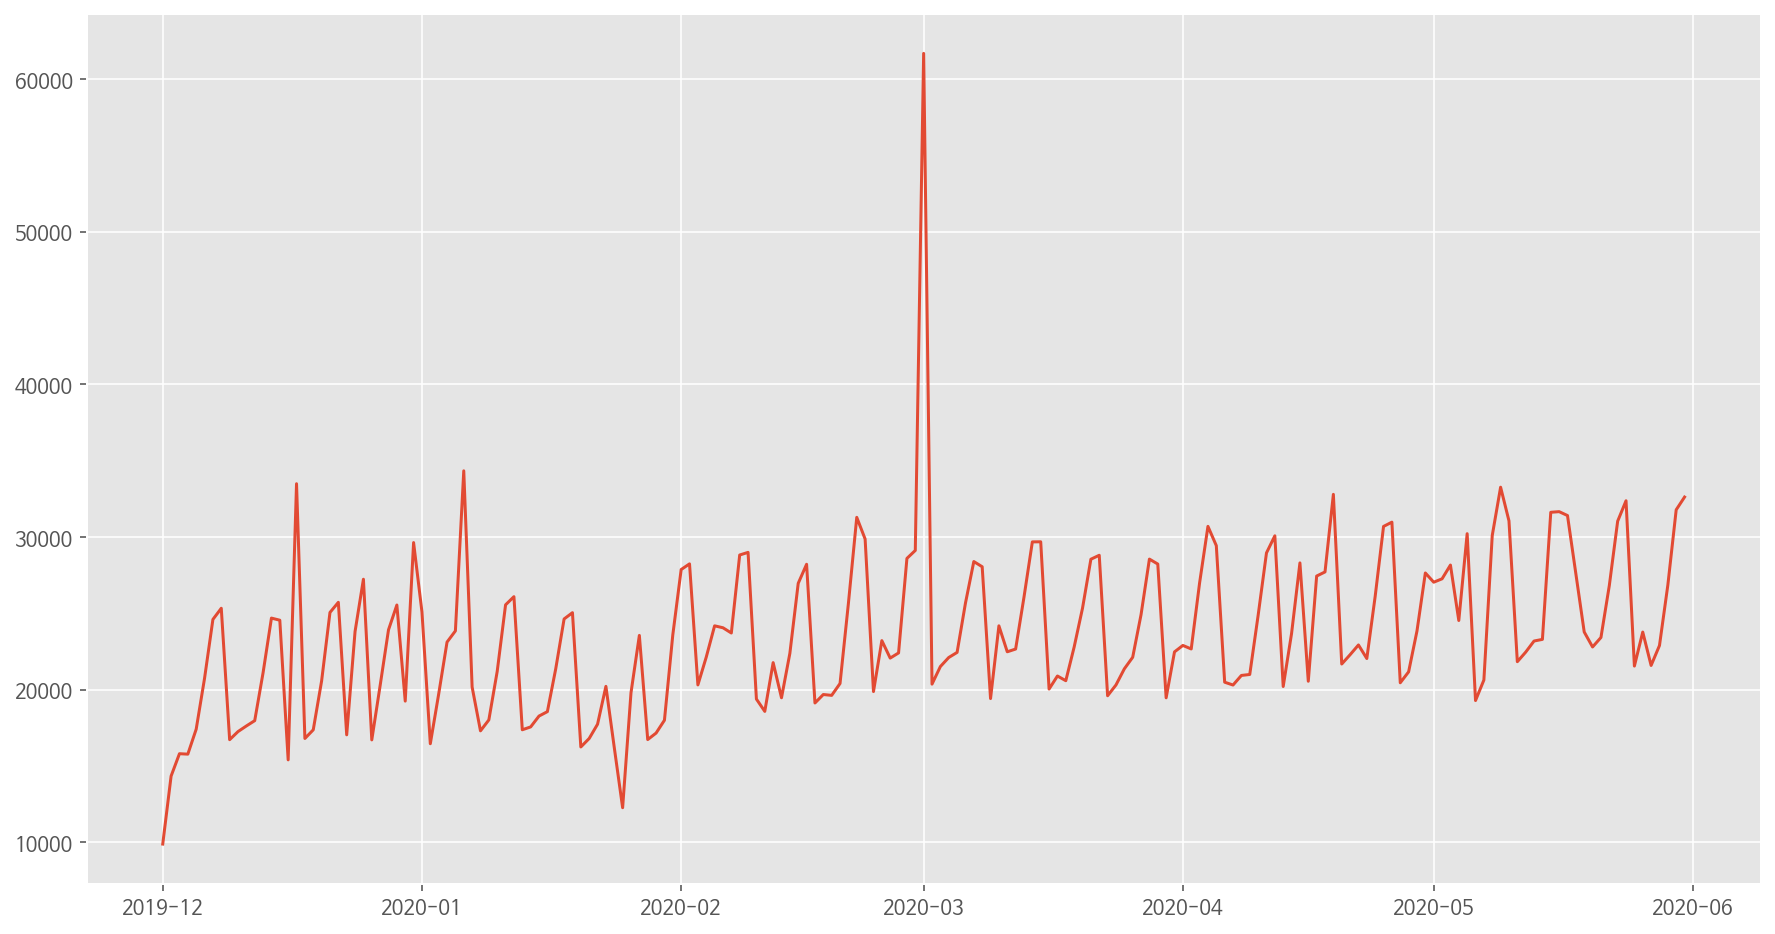

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data.groupby('PROCESS_DT').size())

<BarContainer object of 182 artists>

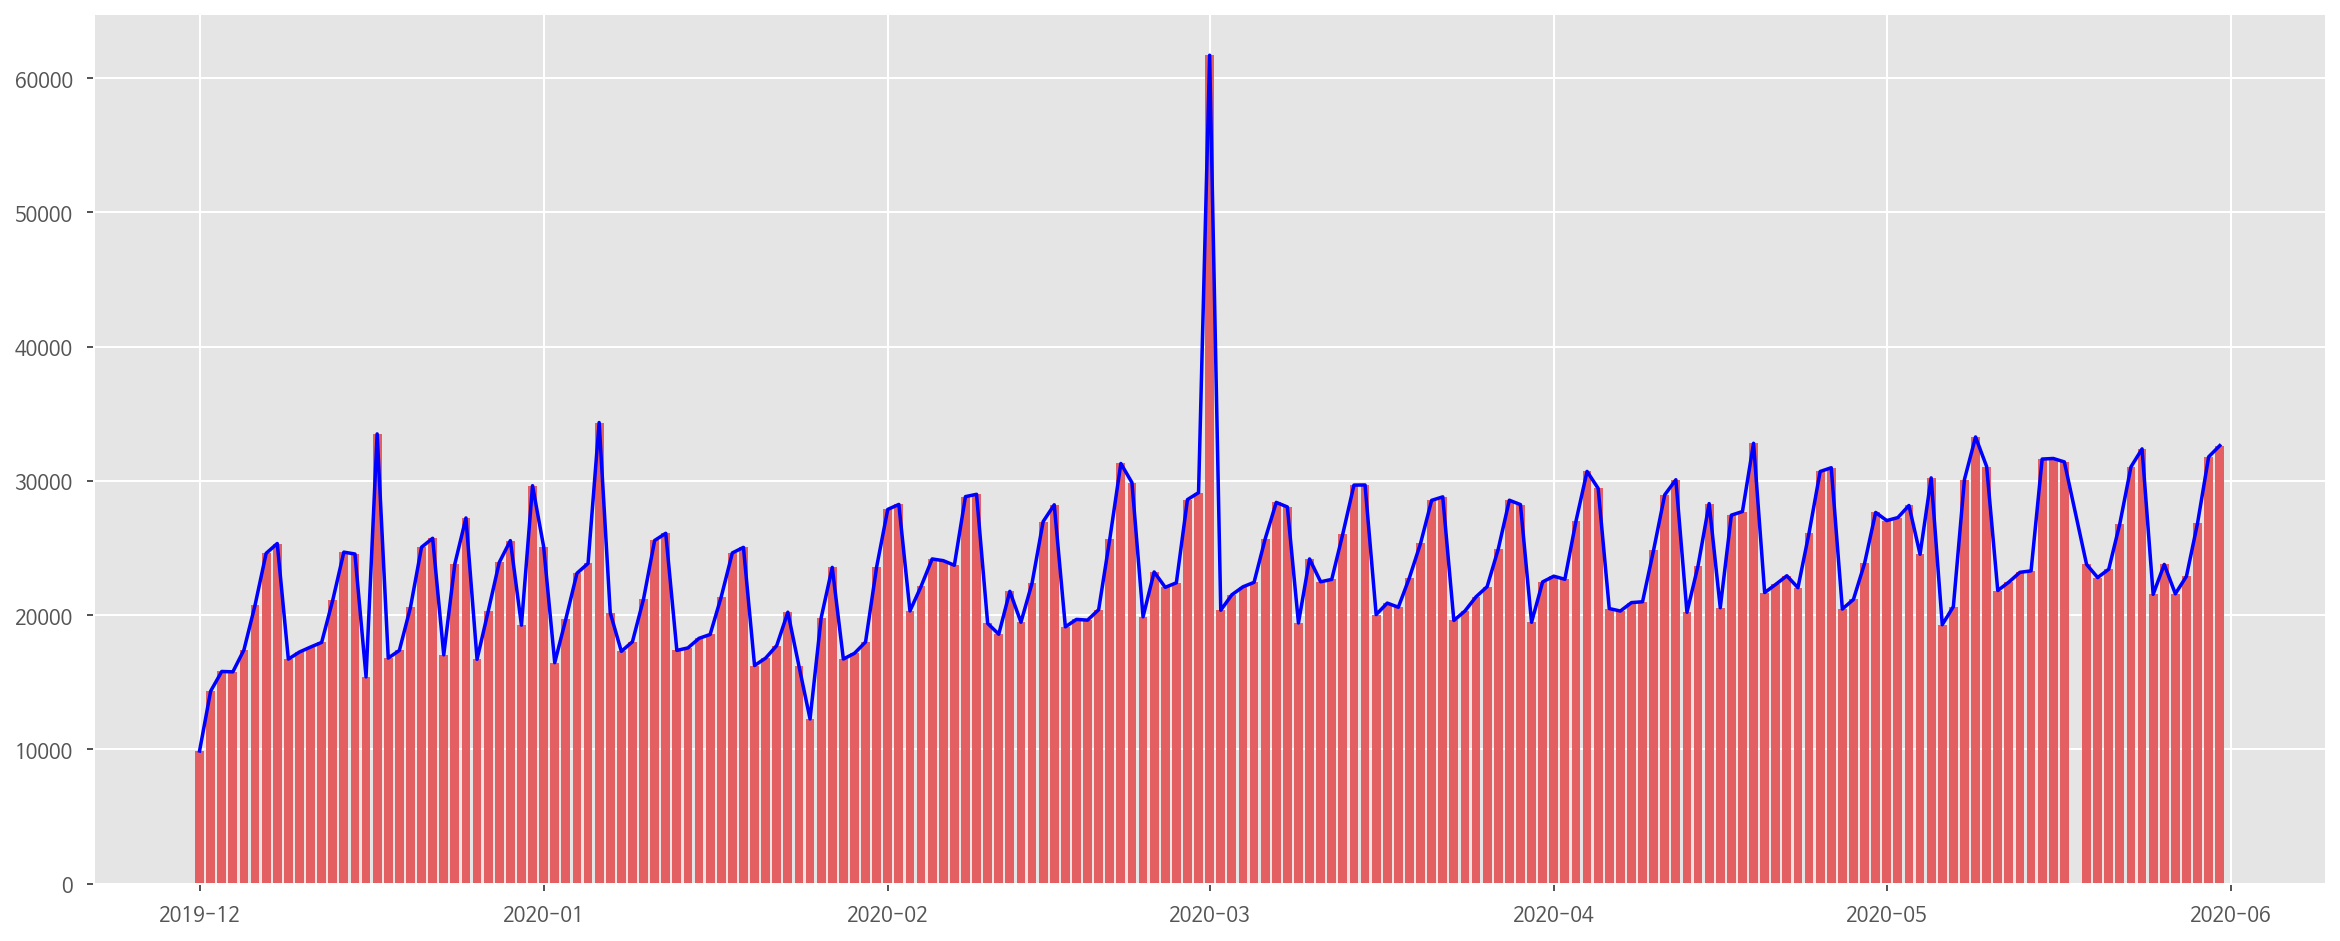

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data.groupby('PROCESS_DT').size(),color='blue')
plt.bar(x=days,height = data.groupby('PROCESS_DT').size(),color='#e35f62')

<BarContainer object of 90 artists>

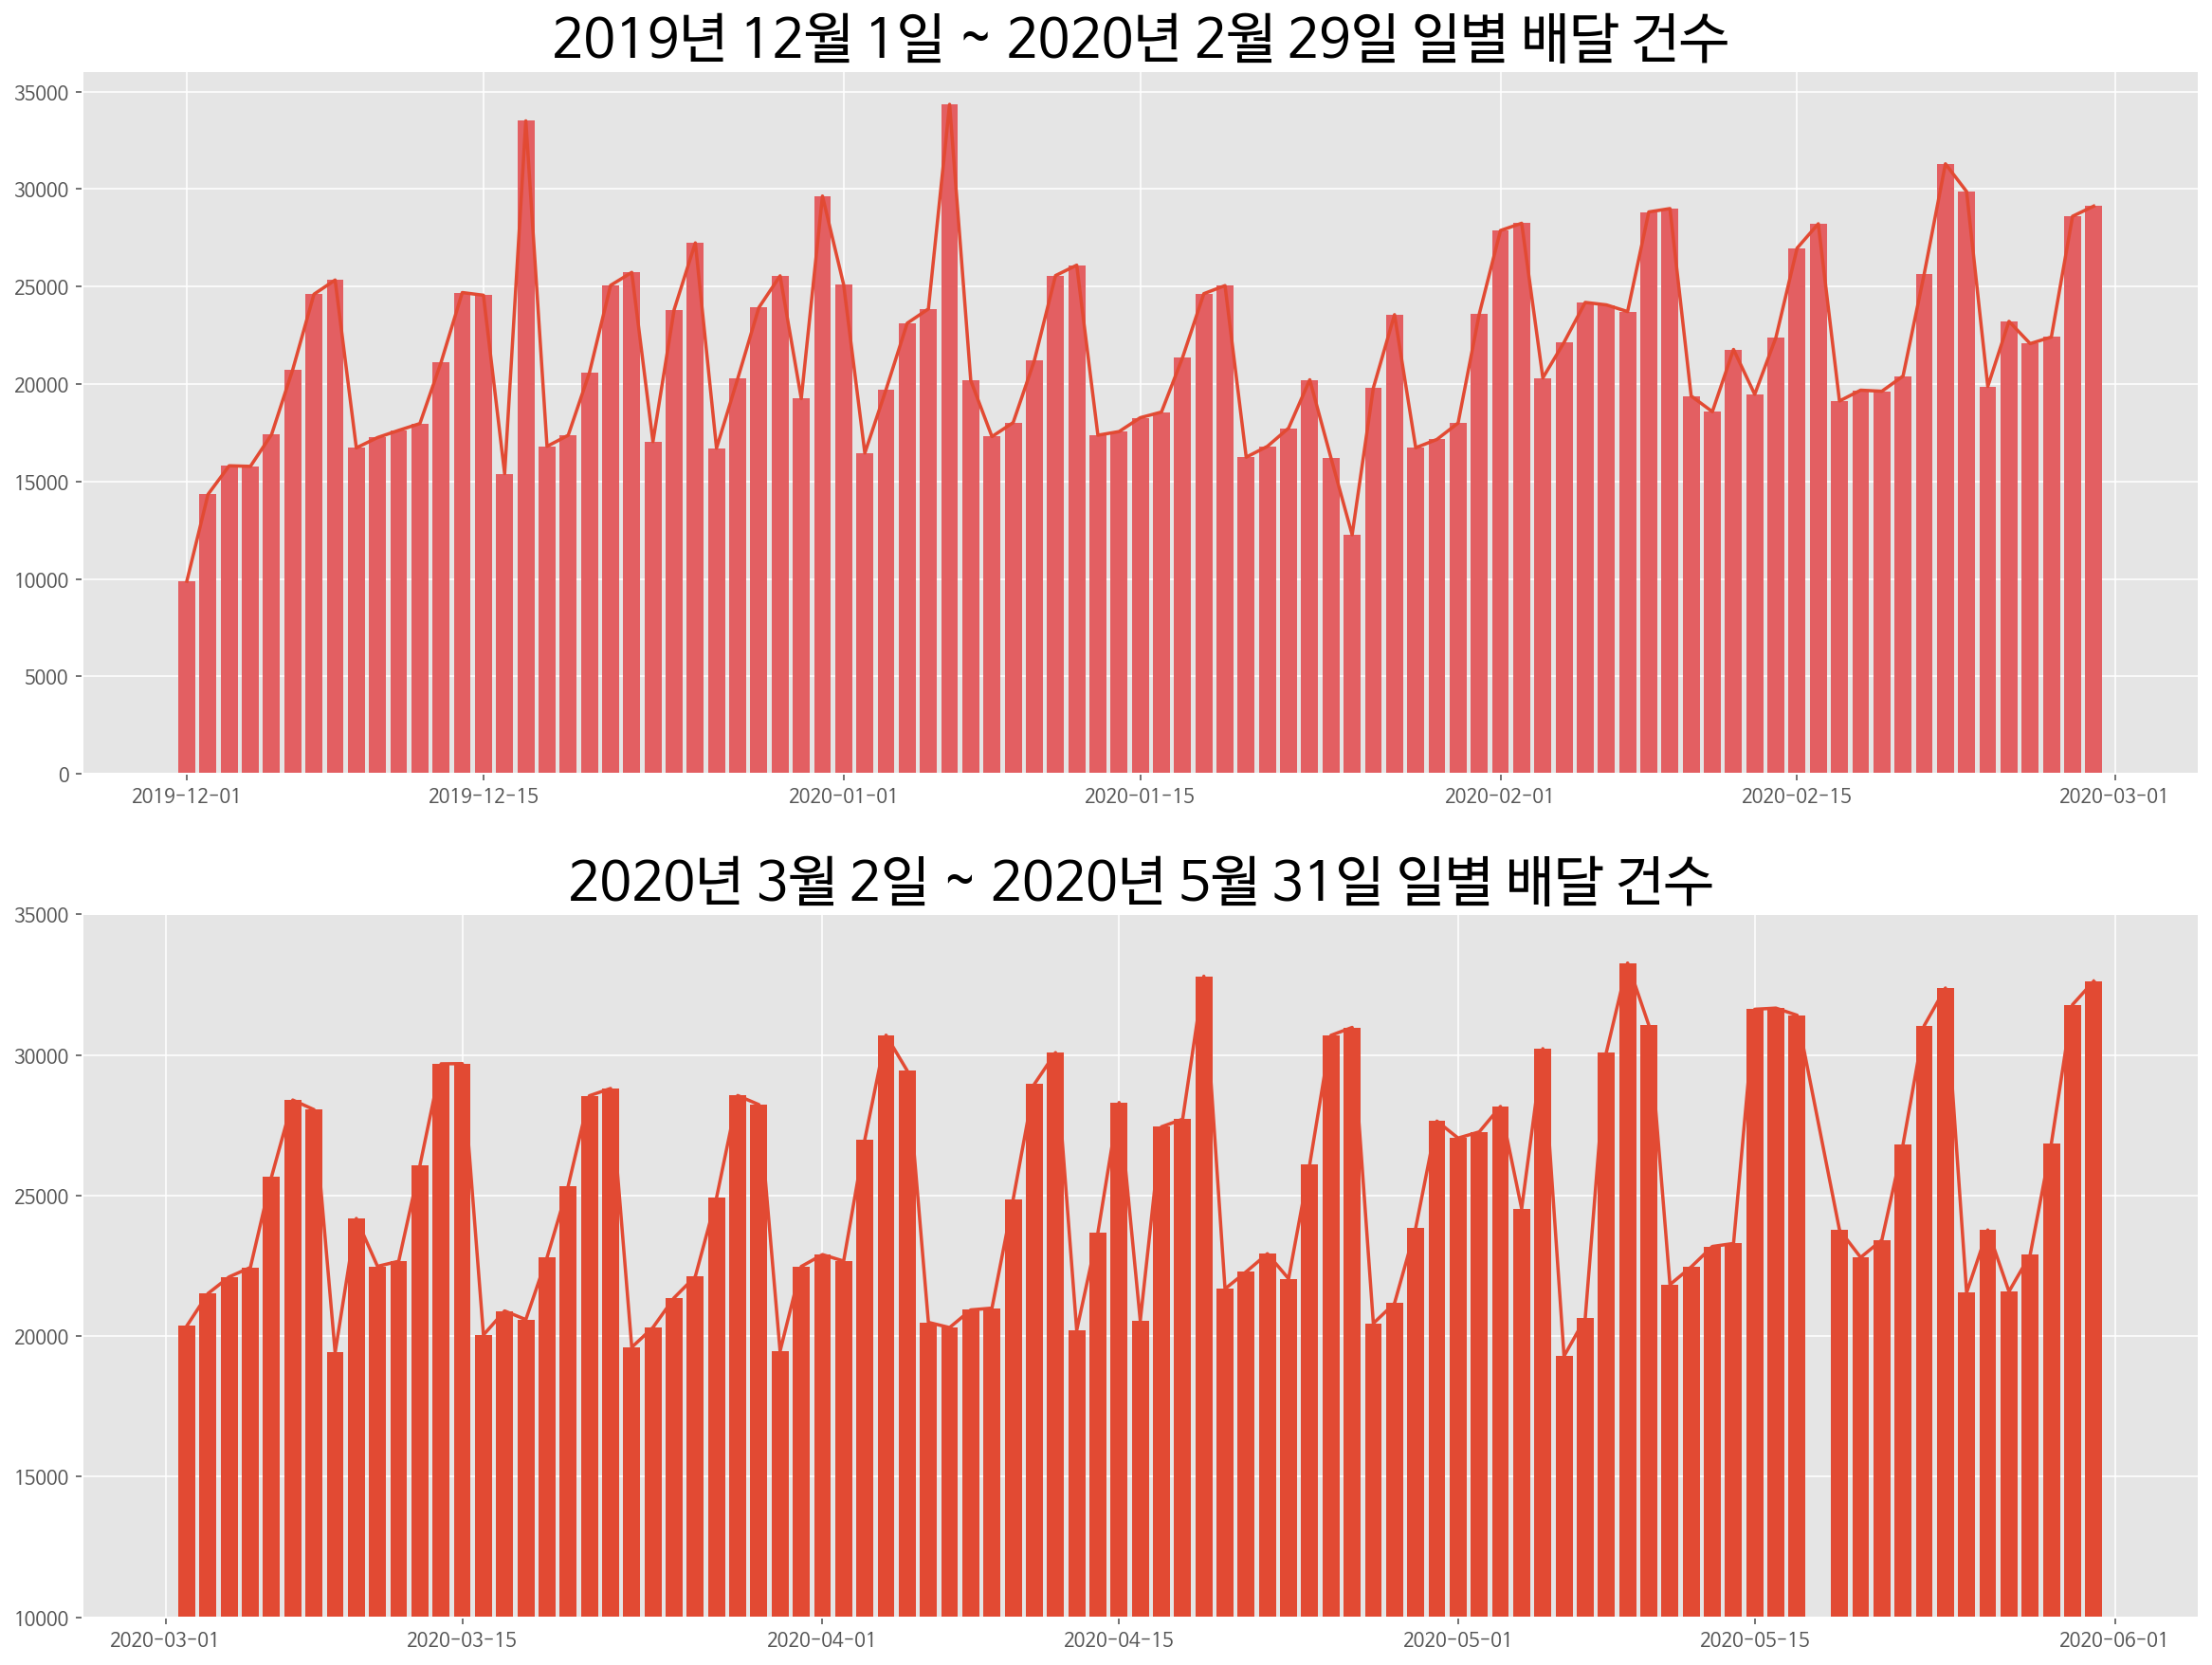

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
plt.ylim(10000,35000)
plt.rc('font', family='NanumBarunGothic') 
plt.rc('font', size=20) 
ax[0].set_title('2019년 12월 1일 ~ 2020년 2월 29일 일별 배달 건수')
ax[1].set_title('2020년 3월 2일 ~ 2020년 5월 31일 일별 배달 건수')
plt.style.use('seaborn-notebook')
ax[0].plot(data.groupby('PROCESS_DT').size()[:91])
ax[0].bar(x=days[:91],height = data.groupby('PROCESS_DT').size()[:91],color='#e35f62')
ax[1].plot(data.groupby('PROCESS_DT').size()[92:])
ax[1].bar(x=days[92:],height = data.groupby('PROCESS_DT').size()[92:])

In [ ]:
print(sum(data.groupby('PROCESS_DT').size()[:91])/len(data.groupby('PROCESS_DT').size()[:91]))
print(sum(data.groupby('PROCESS_DT').size()[92:])/len(data.groupby('PROCESS_DT').size()[92:]))

21644.032967032967
25166.244444444445


In [ ]:
g=pd.DataFrame(data.groupby('PROCESS_DT').size())
g['1']=pd.date_range("2019-12-01",periods=182,freq="D")
g

,0,1
PROCESS_DT,,
2019-12-01,9879,2019-12-01
2019-12-02,14335,2019-12-02
2019-12-03,15802,2019-12-03
2019-12-04,15772,2019-12-04
2019-12-05,17407,2019-12-05
2019-12-06,20741,2019-12-06
2019-12-07,24602,2019-12-07
2019-12-08,25333,2019-12-08
2019-12-09,16720,2019-12-09


In [ ]:
data.groupby('PROCESS_DT').resample('D').size()

In [ ]:
dlvr[dlvr['PROCESS_DT']=='2020-05-18']

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(x=days,height = data.groupby('PROCESS_DT').size())

In [ ]:
time=pd.read_csv('/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/Time.csv')
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


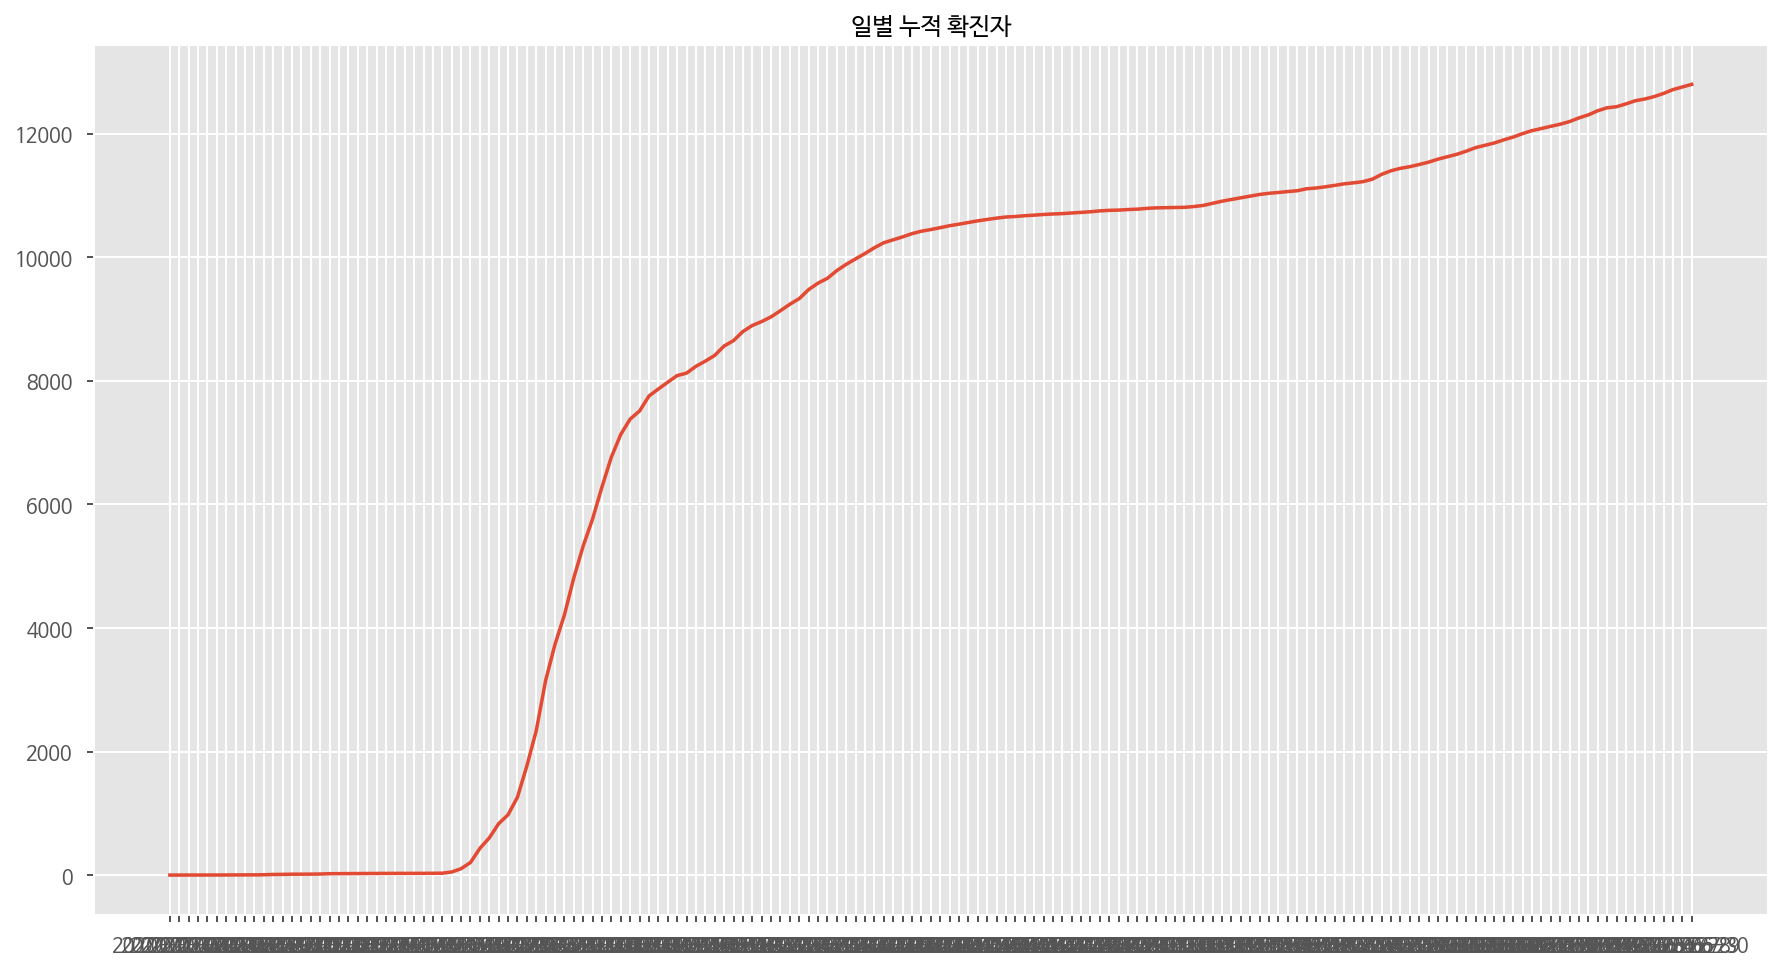

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(Time['date'],Time['confirmed'])
plt.style.use('seaborn-notebook')
plt.title("일별 누적 확진자")
plt.rc('font', size=50)

In [ ]:
policy=pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/Policy.csv")
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [ ]:
policy.sort_values("start_date")

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
48,49,Korea,Technology,Open Data,Patients Information,2020-01-20,NaN
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
19,20,Korea,Health,Emergency Use Authorization of Diagnostic Kit,1st EUA,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
50,51,Korea,Technology,Self-Diagnosis App,NaN,2020-02-12,NaN
20,21,Korea,Health,Emergency Use Authorization of Diagnostic Kit,2nd EUA,2020-02-12,NaN


In [ ]:
patientinfo.groupby('confirmed_date').size()

confirmed_date
2020-01-20     1
2020-01-23     1
2020-01-26     1
2020-01-27     1
2020-01-30     4
              ..
2020-06-26    40
2020-06-27    48
2020-06-28    38
2020-06-29    25
2020-06-30     7
Length: 148, dtype: int64

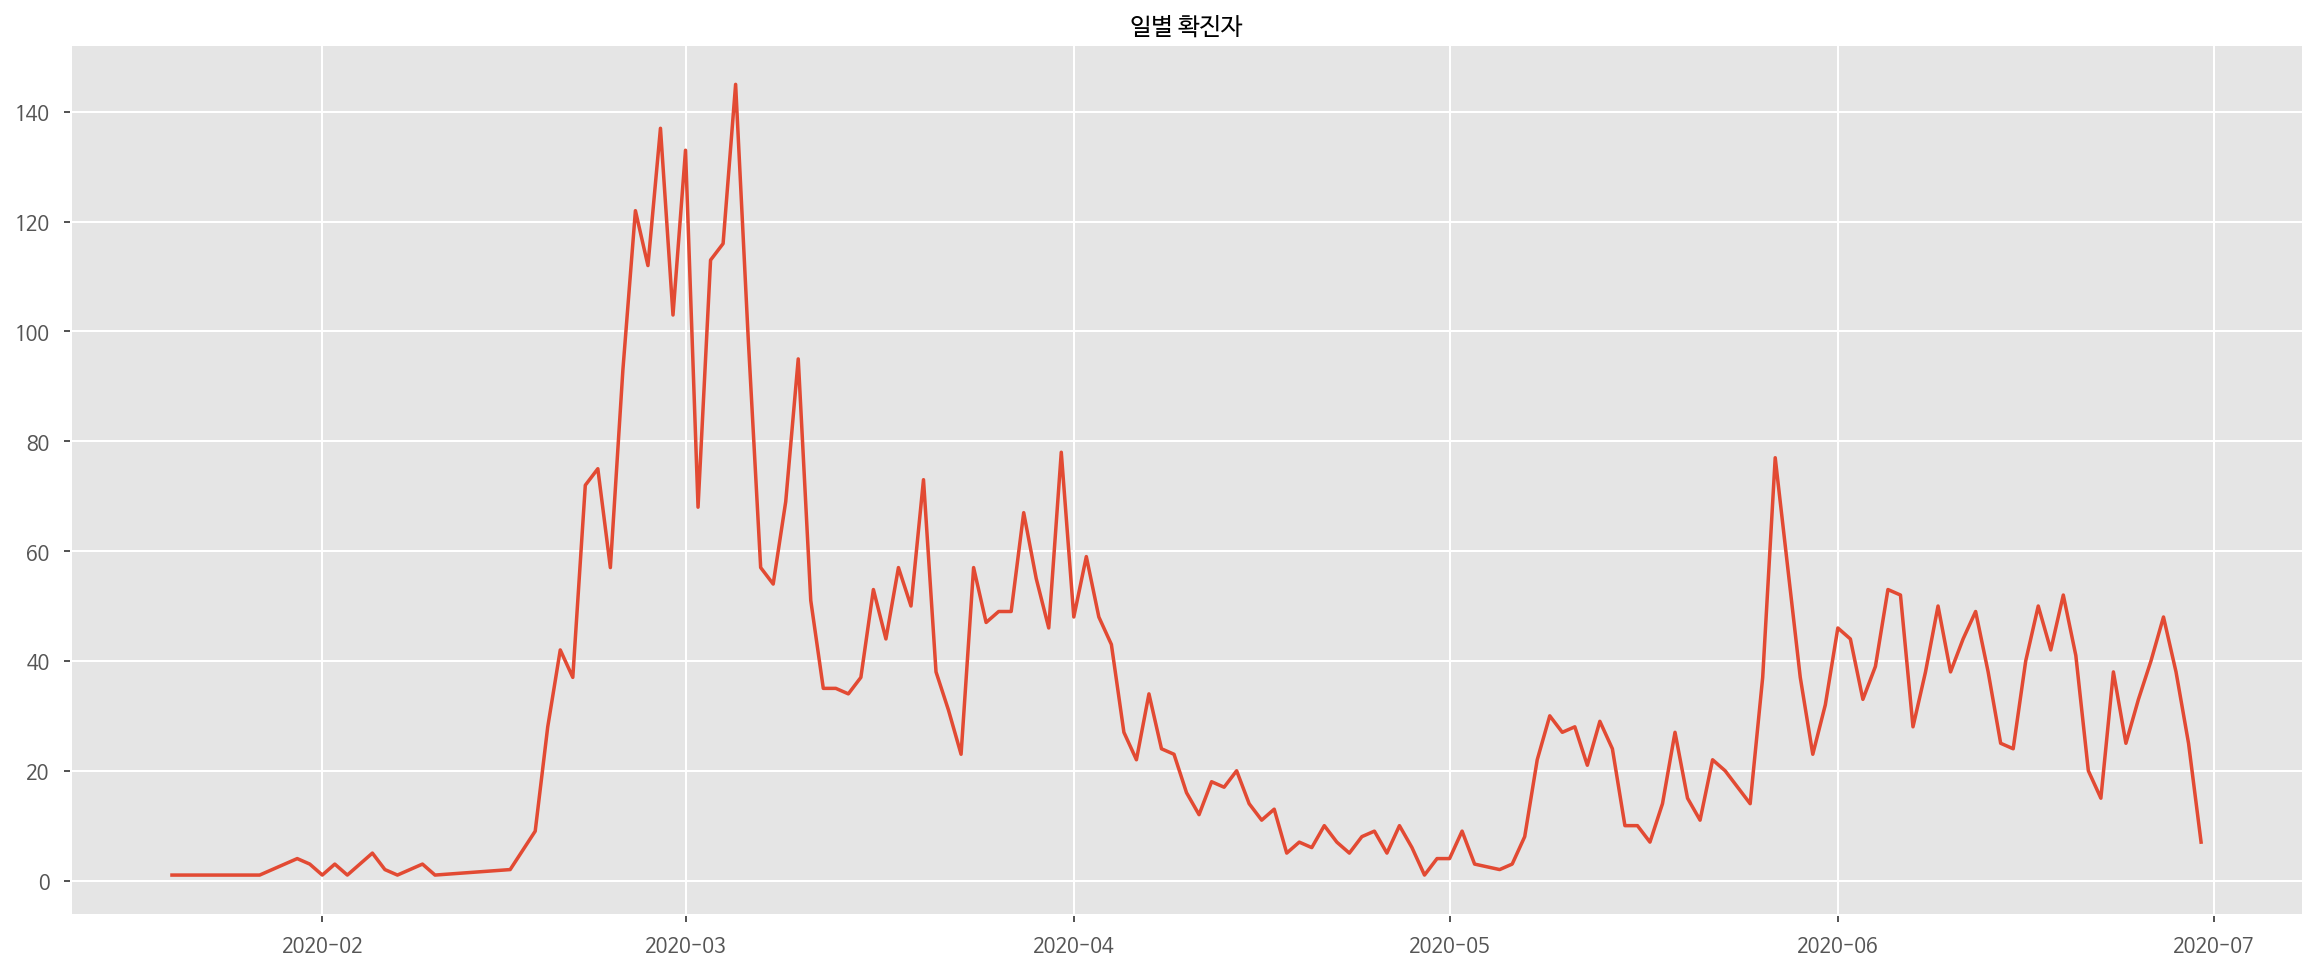

In [ ]:
plt.figure(figsize=(20,8))
plt.rc('font', size=20) 
plt.title("일별 확진자")

plt.plot(patientinfo.groupby('confirmed_date').size())

In [ ]:
st=

NameError: ignored

In [ ]:
Time['date']=pd.to_datetime(Time['date'])
Time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0
